In [1]:
pip install geneticalgorithm2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 3.4 MB/s eta 0:00:00


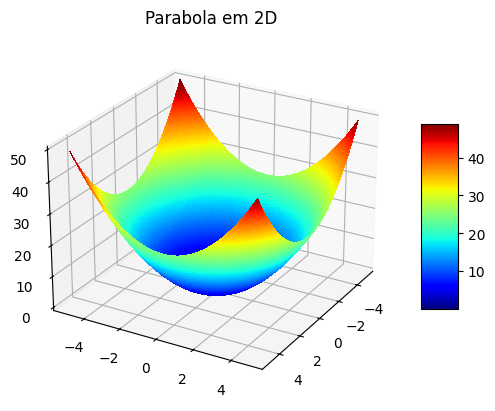

In [4]:
#FUNÇÃO parabola
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#função parabola
def f(X):
    dim=len(X)
    OF=0
    for i in range (0,dim):
        OF+=(X[i]**2)
    return OF

#faz a figuras da função objetivo em 3D
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
Z=np.zeros([len(x),len(y)])
for qX in range(0,len(x)):
  for qY in range(0,len(y)):
    Z[qX,qY]=f([x[qX]])+f([y[qY]])

X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.view_init(elev=25, azim=30)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.jet,
    linewidth=0, antialiased=False)
#ax.set_zlim(0, 100)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Parabola em 2D');

limites das soluções:  [[-5  5]]

Set: Average time of function evaluating (secs): 2.3722648620605467e-06 (total = 4.744529724121094e-05)

Best score before optimization: 0.13510091265585894
                                                                                                                                                                                                        
 The best found solution:
 [-0.12245037]

 Objective function:
 0.014994093879432374

 Used generations: 30
 Used time: 0.063 seconds


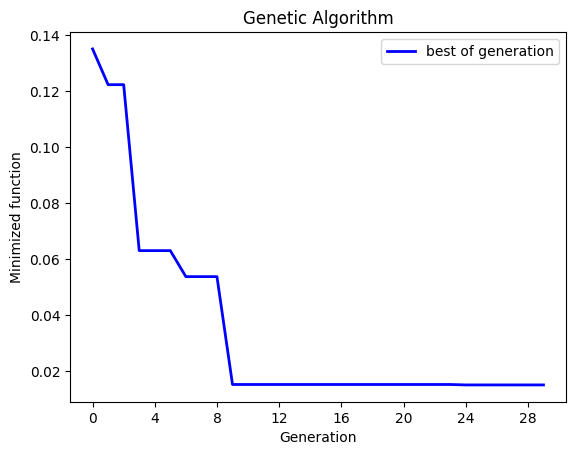

/usr/local/lib/python3.10/dist-packages/geneticalgorithm2/geneticalgorithm2.py:62: UserWarning: 'output_dict' is deprecated and will be removed at version 7 
use 'result' instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geneticalgorithm2/data_types/result.py:25: UserWarning: 'function' field is deprecated, will be removed in version 7, use 'score' to get best population score
  warnings.warn(


In [7]:
from geneticalgorithm2 import geneticalgorithm2 as ga
varbound = np.array([[-5,5]])
print('limites das soluções: ',varbound)

model = ga(function=f, dimension = 1,
                variable_type='real',
                 variable_boundaries = varbound,
                 variable_type_mixed = None,
                 algorithm_parameters={'max_num_iteration': 30,
                                       'population_size':20,
                                       'mutation_probability':0.1,
                                       'elit_ratio': 0.01,
                                       'parents_portion': 0.3}
            )

model.run(no_plot=False,disable_printing=False,disable_progress_bar=False)
#print(model.output_dict.keys())
xmin=model.output_dict['variable']
fmin=model.output_dict['function']


Set: Average time of function evaluating (secs): 7.729530334472657e-06 (total = 0.0007729530334472656)

Best score before optimization: 10.01750648873193
                                                                                                                                                                                                        
 The best found solution:
 [-4.85911264e-03  9.97445011e-06]

 Objective function:
 0.00468388849055934

 Used generations: 200
 Used time: 0.926 seconds


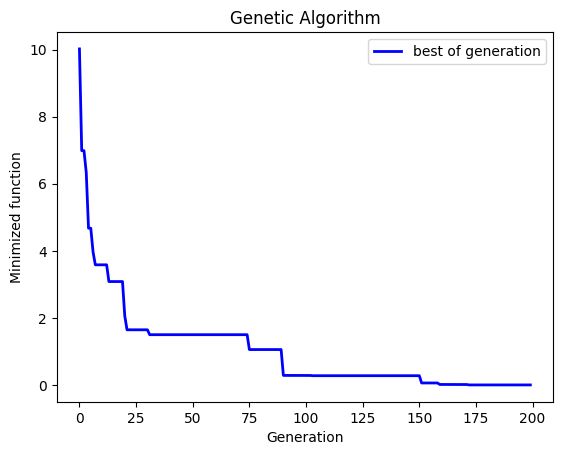

Text(0, 0.5, 'x2')

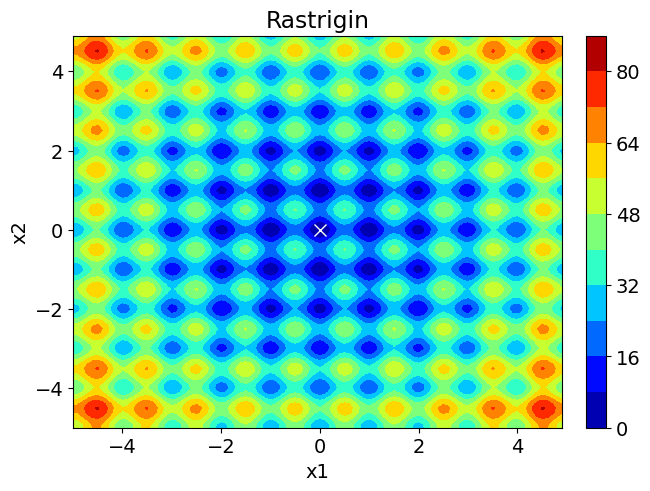

In [9]:
#https://pypi.org/project/geneticalgorithm2/

# EXEMPLO 2: DUAS DIMENSÕES E FUNÇÃO COMPLEXA - RASTRIGIN
import matplotlib.pyplot as plt
import numpy as np
from geneticalgorithm2 import geneticalgorithm2 as ga

#dimensão do problema
prob_dim=2;
#função Rastrigin
def f(X):
    dim=len(X)
    OF=0
    for i in range (0,dim):
        OF+=(X[i]**2)-10*np.cos(2*np.pi*X[i])+10
    return OF

varbound=np.array([[-10,10]]*prob_dim)
model = ga(function=f, dimension = prob_dim,
                variable_type='real',
                 variable_boundaries = varbound,
                 variable_type_mixed = None,
                 algorithm_parameters={'max_num_iteration': 200,
                                       'population_size':100,
                                       'mutation_probability':0.1,
                                       'elit_ratio': 0.01,
                                       'parents_portion': 0.3,
                                       'crossover_type':'uniform',
                                       'mutation_type': 'uniform_by_center',
                                       'selection_type': 'roulette',
                                       'max_iteration_without_improv':None}
            )
model.run(no_plot=False,disable_printing=False,disable_progress_bar=False)
xmin=model.output_dict['variable']

#faz a figuras da função objetivo em mapa de cores
x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-5, 5, 0.1)
X1, X2 = np.meshgrid(x1, x2)
Z=f([X1,X2])
plt.rcParams.update({'font.size': 14})
fig1, ax1 = plt.subplots(constrained_layout=True)
CS = ax1.contourf(X1, X2, Z, 10, cmap=plt.cm.jet, origin='lower')
fig1.colorbar(CS)
plt.plot(xmin[0],xmin[1],'wx',markersize=8)
plt.title('Rastrigin');
plt.xlabel('x1');plt.ylabel('x2')


Set: Average time of function evaluating (secs): 4.329681396484375e-06 (total = 0.0004329681396484375)

Best score before optimization: 12.615825751324586
                                                                                                                                                                                                        
 The best found solution:
 [ 2.88321312e-10 -2.75263145e-05]

 Objective function:
 1.5032128608538642e-07

 Used generations: 2000
 Used time: 9.36 seconds


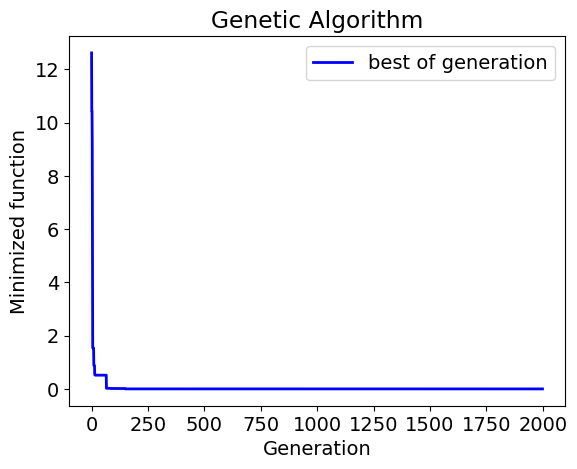

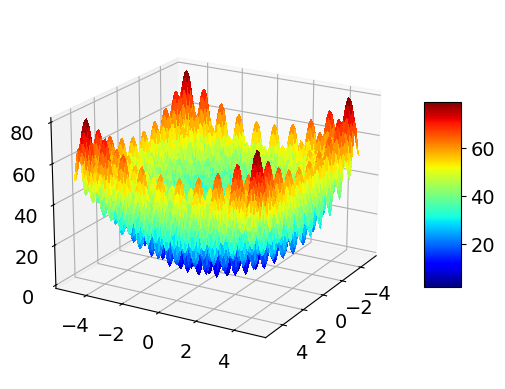

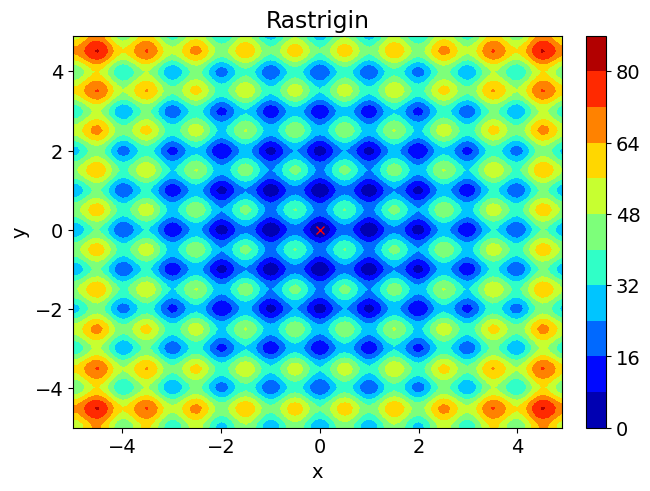

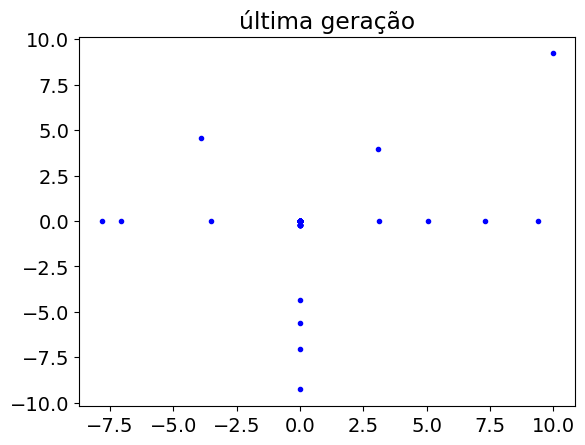

In [12]:
#https://pypi.org/project/geneticalgorithm2/

# EXEMPLO 2: DUAS DIMENSÕES E FUNÇÃO COMPLEXA - RASTRIGIN

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from geneticalgorithm2 import geneticalgorithm2 as ga

#dimensão do problema
prob_dim=2;
#função Rastrigin
def f(X):
    dim=len(X)
    OF=0
    for i in range (0,dim):
        OF+=(X[i]**2)-10*np.cos(2*np.pi*X[i])+10
    return OF

varbound=np.array([[-10,10]]*prob_dim)

model = ga(function=f, dimension = prob_dim,
                variable_type='real',
                 variable_boundaries = varbound,
                 variable_type_mixed = None,
                 algorithm_parameters={'max_num_iteration': None,
                                       'population_size':100,
                                       'mutation_probability':0.1,
                                       'elit_ratio': 0.01,
                                       'parents_portion': 0.3,
                                       'crossover_type':'uniform',
                                       'mutation_type': 'uniform_by_center',
                                       'selection_type': 'roulette',
                                       'max_iteration_without_improv':None}
            )

model.run()
last_gen=model.output_dict['last_generation']
var=last_gen['variables']
xmin=model.output_dict['variable']
fmin=model.output_dict['function']

#faz a figuras da função objetivo em 3D
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
Z=np.zeros([len(x),len(y)])
for qX in range(0,len(x)):
  for qY in range(0,len(y)):
    Z[qX,qY]=f([x[qX]])+f([y[qY]])

X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.jet,
    linewidth=0, antialiased=False)
#ax.set_zlim(0, 100)

ax.view_init(elev=20, azim=30)

fig.colorbar(surf, shrink=0.5, aspect=5)

fig1, ax2 = plt.subplots(constrained_layout=True)
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.jet, origin='lower')
fig1.colorbar(CS)

plt.plot(xmin[0],xmin[1],'rx')
plt.title('Rastrigin');
plt.xlabel('x');plt.ylabel('y')

plt.figure()
plt.plot(var[:,0],var[:,1],'b.')
plt.title('última geração');



Set: Average time of function evaluating (secs): 3.8671493530273435e-06 (total = 0.0003867149353027344)

Best score before optimization: 10.419091324040938
                                                                                                                                                                                                        
 The best found solution:
 [0.0058149]

 Objective function:
 10.00670751287001

 Used generations: 500
 Used time: 2.15 seconds


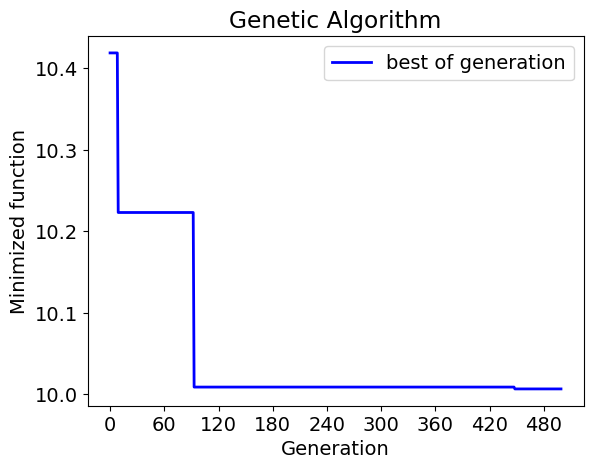

tempo de execução: 2.691426992416382


<Figure size 640x480 with 0 Axes>

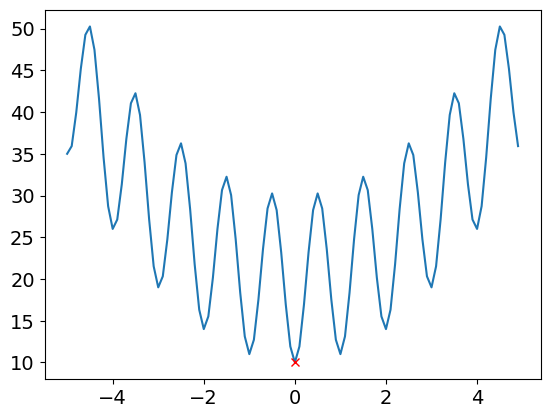

In [14]:
#https://pypi.org/project/geneticalgorithm2/

# PROBLEMA DE 1 DIMENSÃO, FUNÇÃO COMPLEXA

import numpy as np
import math
import matplotlib.pyplot as plt
from geneticalgorithm2 import geneticalgorithm2 as ga
import time
tinicial = time.time()

def fobj(X):
    dim=len(X)
    OF=0
    for i in range (0,dim):
        OF+=(X[i]**2)-10*math.cos(2*math.pi*X[i])+10+10
    return OF

varbound = np.array([[0,10]])

model = ga(function=fobj, dimension = 1,
                variable_type='real',
                 variable_boundaries = varbound,
                 variable_type_mixed = None,
                 algorithm_parameters={'max_num_iteration': None,
                                       'population_size':100,
                                       'mutation_probability':0.1,
                                       'elit_ratio': 0.01,
                                       'parents_portion': 0.3,
                                       'crossover_type':'uniform',
                                       'mutation_type': 'uniform_by_center',
                                       'selection_type': 'roulette',
                                       'max_iteration_without_improv':None}
            )

model.run()

#print(model.output_dict)
xmin=model.output_dict['variable']
fmin=model.output_dict['function']

plt.figure(1)
x = np.arange(-5, 5, 0.1)
y=np.zeros([len(x),1])
for qX in range(0,len(x)):
  y[qX]=fobj([x[qX]])
plt.figure(2)
plt.plot(x,y)
plt.plot(xmin,fmin,'rx')
print("tempo de execução:", time.time() - tinicial)